<a href="https://colab.research.google.com/github/Chandru-018/Chandrasekhar_INFO5731_FALL2024/blob/main/Karumanchi_Chandrasekhar_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
import re
from collections import defaultdict
import pandas as pd
from itertools import combinations

# Sample dataset (replace with your actual dataset)
reviews = [
    "I really like this product. It works well.",
    "This is an amazing product, I really like it.",
    "Worst product ever. Do not buy it.",
    "Highly recommend this amazing product, it works perfectly."
]

# Step 1: Count trigrams (N=3)
def count_ngrams(reviews, n=3):
    ngram_counts = defaultdict(int)

    # Iterate over each review
    for review in reviews:
        # Tokenize the review (simple space-based tokenizer)
        words = re.findall(r'\b\w+\b', review.lower())  # lowercasing and word boundary

        # Generate n-grams
        for i in range(len(words) - n + 1):
            ngram = tuple(words[i:i + n])
            ngram_counts[ngram] += 1

    return ngram_counts

# Count trigrams in the dataset
trigram_counts = count_ngrams(reviews, n=3)

# Display the trigram frequencies
print("Trigram Frequencies:")
for trigram, count in trigram_counts.items():
    print(f"{trigram}: {count}")

# Step 2: Calculate bigram probabilities
def calculate_bigram_probabilities(reviews):
    # Count unigrams and bigrams
    unigram_counts = defaultdict(int)
    bigram_counts = defaultdict(int)

    for review in reviews:
        words = re.findall(r'\b\w+\b', review.lower())

        # Count unigrams and bigrams
        for i in range(len(words) - 1):
            unigram_counts[words[i]] += 1
            bigram_counts[(words[i], words[i+1])] += 1

    bigram_probabilities = defaultdict(float)

    # Calculate bigram probabilities
    for bigram, count in bigram_counts.items():
        w1 = bigram[0]
        probability = count / unigram_counts[w1]
        bigram_probabilities[bigram] = probability

    return bigram_probabilities

# Calculate bigram probabilities
bigram_probabilities = calculate_bigram_probabilities(reviews)

# Display the bigram probabilities
print("\nBigram Probabilities:")
for bigram, prob in bigram_probabilities.items():
    print(f"P({bigram[1]} | {bigram[0]}) = {prob:.2f}")

# Step 3: Extract noun phrases (simple extraction based on assumption of noun sequences)
def extract_noun_phrases(reviews):
    noun_phrases = defaultdict(int)

    for review in reviews:
        words = re.findall(r'\b\w+\b', review.lower())

        # Assuming noun phrases are sequences of nouns (we simplify this approach)
        for i in range(len(words) - 1):
            noun_phrase = ' '.join(words[i:i+2])  # Consider pairs of words as noun phrases
            noun_phrases[noun_phrase] += 1

    return noun_phrases

# Extract noun phrases from the reviews
noun_phrases = extract_noun_phrases(reviews)

# Step 4: Calculate relative noun phrase frequencies for each review
def calculate_relative_noun_phrase_frequencies(reviews, noun_phrases):
    max_freq = max(noun_phrases.values())

    # Create a dataframe to store relative frequencies for each review
    noun_phrase_matrix = []

    for review in reviews:
        review_noun_phrases = extract_noun_phrases([review])
        relative_frequencies = {}

        # Calculate relative frequency for each noun phrase
        for noun_phrase in noun_phrases:
            freq = review_noun_phrases.get(noun_phrase, 0)
            relative_frequencies[noun_phrase] = freq / max_freq

        noun_phrase_matrix.append(relative_frequencies)

    # Create DataFrame from the matrix
    noun_phrase_df = pd.DataFrame(noun_phrase_matrix)
    return noun_phrase_df

# Calculate relative frequencies
noun_phrase_df = calculate_relative_noun_phrase_frequencies(reviews, noun_phrases)

# Display the result in a table (for all reviews)
print("\nRelative Noun Phrase Frequencies (per review):")
print(noun_phrase_df)



Trigram Frequencies:
('i', 'really', 'like'): 2
('really', 'like', 'this'): 1
('like', 'this', 'product'): 1
('this', 'product', 'it'): 1
('product', 'it', 'works'): 2
('it', 'works', 'well'): 1
('this', 'is', 'an'): 1
('is', 'an', 'amazing'): 1
('an', 'amazing', 'product'): 1
('amazing', 'product', 'i'): 1
('product', 'i', 'really'): 1
('really', 'like', 'it'): 1
('worst', 'product', 'ever'): 1
('product', 'ever', 'do'): 1
('ever', 'do', 'not'): 1
('do', 'not', 'buy'): 1
('not', 'buy', 'it'): 1
('highly', 'recommend', 'this'): 1
('recommend', 'this', 'amazing'): 1
('this', 'amazing', 'product'): 1
('amazing', 'product', 'it'): 1
('it', 'works', 'perfectly'): 1

Bigram Probabilities:
P(really | i) = 1.00
P(like | really) = 1.00
P(this | like) = 0.50
P(product | this) = 0.33
P(it | product) = 0.50
P(works | it) = 1.00
P(well | works) = 0.50
P(is | this) = 0.33
P(an | is) = 1.00
P(amazing | an) = 1.00
P(product | amazing) = 1.00
P(i | product) = 0.25
P(it | like) = 0.50
P(product | worst

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [11]:
import math
import re
import numpy as np

# dataset
documents = [
    "All our dreams can come true, if we have the courage to pursue them.",
    "In the midst of movement and chaos, keep stillness inside of you.",
    "Always bear in mind that your own resolution to success is more important than any other one thing.",
    "Success is not final; failure is not fatal: It is the courage to continue that counts.",
    "Develop success from failures. Discouragement and failure are two of the surest stepping stones to success."
]

# Step 1: Preprocess and tokenize the documents
def preprocess(doc):
    # Convert to lowercase and remove non-alphabetic characters
    return re.findall(r'\b\w+\b', doc.lower())

# Step 2: Compute Term Frequency (TF)
def compute_tf(documents):
    tf = {}
    for doc in documents:
        tokens = preprocess(doc)
        tf_doc = {}
        for word in tokens:
            tf_doc[word] = tf_doc.get(word, 0) + 1
        # Normalize the TF by dividing by the total number of terms in the document
        total_terms = len(tokens)
        for word in tf_doc:
            tf_doc[word] /= total_terms
        tf[doc] = tf_doc
    return tf

# Step 3: Compute Inverse Document Frequency (IDF)
def compute_idf(documents):
    idf = {}
    total_docs = len(documents)
    # Count the number of documents that contain each term
    term_doc_count = {}
    for doc in documents:
        tokens = set(preprocess(doc))  # Use set to avoid double counting words in the same document
        for word in tokens:
            term_doc_count[word] = term_doc_count.get(word, 0) + 1

    # Compute IDF for each term
    for word, doc_count in term_doc_count.items():
        idf[word] = math.log(total_docs / doc_count)
    return idf

# Step 4: Compute the TF-IDF matrix
def compute_tfidf(tf, idf):
    tfidf = {}
    for doc, tf_doc in tf.items():
        tfidf_doc = {}
        for word, tf_value in tf_doc.items():
            tfidf_doc[word] = tf_value * idf[word]
        tfidf[doc] = tfidf_doc
    return tfidf

# Step 5: Compute Cosine Similarity
def cosine_similarity(vec1, vec2):
    # Get the common terms between the two vectors
    all_terms = set(vec1.keys()).union(set(vec2.keys()))
    dot_product = sum(vec1.get(term, 0) * vec2.get(term, 0) for term in all_terms)
    norm1 = math.sqrt(sum(value ** 2 for value in vec1.values()))
    norm2 = math.sqrt(sum(value ** 2 for value in vec2.values()))
    return dot_product / (norm1 * norm2)

# Step 6: Rank documents by cosine similarity to a query
def rank_documents(query, tfidf, documents):
    query_tokens = preprocess(query)

    # Compute the TF for the query (using the same process as for the documents)
    query_tf = {}
    for word in query_tokens:
        query_tf[word] = query_tf.get(word, 0) + 1
    total_query_terms = len(query_tokens)
    for word in query_tf:
        query_tf[word] /= total_query_terms

    # Calculate TF-IDF for the query
    query_tfidf = {word: query_tf[word] * idf[word] for word in query_tf}

    # Calculate cosine similarity for each document
    similarities = []
    for doc in documents:
        doc_tfidf = tfidf.get(doc, {})
        similarity = cosine_similarity(query_tfidf, doc_tfidf)
        similarities.append((doc, similarity))

    # Sort documents based on similarity (highest similarity first)
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities

# Preprocessing documents
tf = compute_tf(documents)
idf = compute_idf(documents)
tfidf = compute_tfidf(tf, idf)

# Define a query
query = "All our dreams can come true, if we have the courage to pursue them"

# Rank documents by cosine similarity to the query
ranked_documents = rank_documents(query, tfidf, documents)

# Display ranked documents
print("Ranking of Documents based on the Query:")
for doc, similarity in ranked_documents:
    print(f"Document: {doc}")
    print(f"Cosine Similarity: {similarity:.4f}")
    print("-" * 50)


Ranking of Documents based on the Query:
Document: All our dreams can come true, if we have the courage to pursue them.
Cosine Similarity: 1.0000
--------------------------------------------------
Document: Success is not final; failure is not fatal: It is the courage to continue that counts.
Cosine Similarity: 0.0298
--------------------------------------------------
Document: Develop success from failures. Discouragement and failure are two of the surest stepping stones to success.
Cosine Similarity: 0.0035
--------------------------------------------------
Document: In the midst of movement and chaos, keep stillness inside of you.
Cosine Similarity: 0.0019
--------------------------------------------------
Document: Always bear in mind that your own resolution to success is more important than any other one thing.
Cosine Similarity: 0.0015
--------------------------------------------------


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [12]:
pip install gensim matplotlib


In [13]:
import gensim
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Assuming 'data' contains your documents (e.g., reviews, abstracts, tweets)

# Preprocess the text
def preprocess_text(documents):
    stop_words = set(stopwords.words('english'))
    processed_docs = []

    for doc in documents:
        # Tokenize and clean up the text
        tokens = word_tokenize(doc.lower())
        tokens = [re.sub(r'[^a-zA-Z]', '', word) for word in tokens if word.isalpha()]
        tokens = [word for word in tokens if word not in stop_words]
        processed_docs.append(tokens)

    return processed_docs

# Example data (replace with your actual data)
documents = [
    "This is an outstanding movie with a haunting performance and best character development.",
    "A disappointing movie, with poor performance and weak character development.",
    "An amazing movie that features stunning visuals and great performances."
]

processed_docs = preprocess_text(documents)


In [14]:
# Train the Word2Vec model
model = gensim.models.Word2Vec(sentences=processed_docs, vector_size=300, window=5, min_count=1, sg=1)

# Save the model for later use
model.save("word2vec_model.model")


In [15]:
# Get the vector for a word (e.g., 'movie')
word_vector = model.wv['movie']
print(word_vector)


[-1.78742412e-04  7.88104517e-05  1.70111656e-03  3.00309109e-03
 -3.10098333e-03 -2.37226952e-03  2.15295749e-03  2.99099600e-03
 -1.67180935e-03 -1.25445728e-03  2.46016821e-03 -5.11157094e-04
 -1.51220441e-03  2.18468392e-03 -1.62005343e-03 -6.05339184e-04
  9.58859921e-04  3.30624578e-04 -2.76173837e-03 -3.14960605e-03
  2.43725535e-03  1.69008737e-03  2.25256453e-03  2.54288519e-04
  2.11696350e-03 -1.13512203e-03 -3.15467129e-04  1.92285771e-03
 -2.50721257e-03 -1.31203455e-03 -2.50386074e-03 -3.10014089e-04
  3.17937299e-03 -2.43972219e-03 -7.77922862e-04 -6.45913708e-04
  2.69247894e-03 -1.97696523e-03  1.50541464e-05 -1.58457796e-03
 -3.20118340e-03  1.66909769e-03 -2.91986181e-03 -1.46394176e-03
 -1.16999945e-05 -9.87271487e-05 -2.55374680e-03  3.20491428e-03
  1.66068599e-03  3.07771447e-03 -2.71930569e-03  1.49859942e-03
 -1.37902540e-03  2.74845370e-04  2.83287326e-03 -1.48739223e-03
  1.50583347e-03 -2.26232014e-03 -1.18282950e-03  3.13283596e-03
 -5.25884214e-04  1.07123

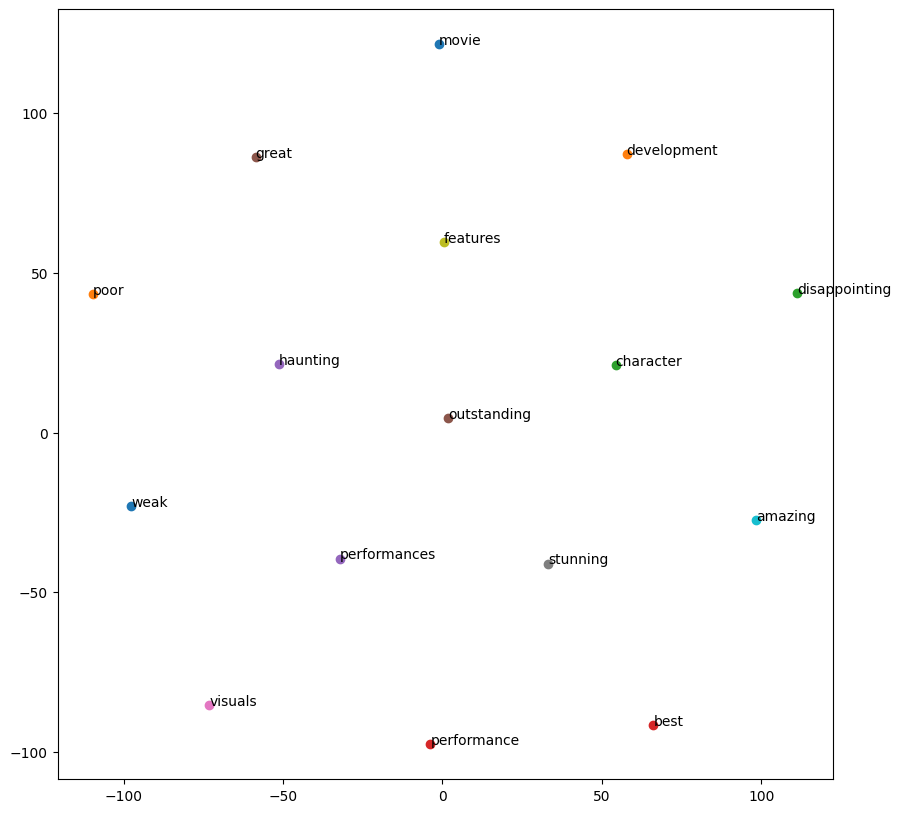

In [19]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Get the word vectors
words = list(model.wv.index_to_key)
word_vectors = [model.wv[word] for word in words]

# Convert the list of word vectors to a NumPy array
word_vectors = np.array(word_vectors)

# Reduce dimensions using t-SNE, setting perplexity lower than n_samples
# Calculate a suitable perplexity (e.g., one-third of the number of samples)
perplexity_value = min(len(words) - 1, 30) # Ensure perplexity is less than n_samples and capped at 30

tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value) # Set perplexity
reduced_vectors = tsne.fit_transform(word_vectors)

# Plot the word embeddings
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
plt.show()

In [20]:
# Find words similar to 'movie'
similar_words = model.wv.most_similar('movie', topn=10)
print(similar_words)


[('weak', 0.08771836757659912), ('best', 0.08673557639122009), ('performance', 0.08134964853525162), ('amazing', 0.0495358370244503), ('character', 0.03316840901970863), ('haunting', 0.027224671095609665), ('great', 0.026316089555621147), ('performances', 0.015785740688443184), ('outstanding', 0.012577591463923454), ('stunning', 0.008682308718562126)]


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:
https://github.com/Chandru-018/Chandrasekhar_INFO5731_FALL2024/blob/main/Dataset%20exp.zip


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
This assignment gave me an understanding on Team Frequency(TF), Inverse Document Frequency(IDF), Cosine Similarity, Latent Semantiv Analysis(LSA), BERTopic, Latent Dirichlet Allocation (LDA), Non-negative Matrix Factorization (NMF). I enjoyed learning all the topics which were taught in the class and the provided time is sufficient to complete thwe assignment.